# Alpha Vantage API
- 5 years of data
- R&D not listed in breakout

In [10]:
import json
import requests
import pandas as pd
import numpy as np

key = json.load(open('data/av_key.json'))

In [42]:
symbol = "DE"

overview_url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=' + symbol + '&apikey=' + key
overview_r = requests.get(overview_url)
overview_data = overview_r.json()

income_url = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=' + symbol + '&apikey=' + key
income_r = requests.get(income_url)
income_data = income_r.json()

balance_url = 'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=' + symbol + '&apikey=' + key
balance_r = requests.get(balance_url)
balance_data = balance_r.json()

cash_url = 'https://www.alphavantage.co/query?function=CASH_FLOW&symbol=' + symbol + '&apikey=' + key
cash_r = requests.get(cash_url)
cash_data = cash_r.json()

In [45]:
# Format into pandas DF
income_df = pd.DataFrame(income_data['quarterlyReports'],dtype=np.float64)
income_df = income_df.set_index('fiscalDateEnding')
income_df = income_df[::-1] # reverse row order
income_df.insert(3,"totalRevTTM",income_df['totalRevenue'].rolling(4,min_periods=4).mean())
income_df.insert(9,"researchDevTTM",income_df['researchAndDevelopment'].rolling(4,min_periods=4).mean())
print(income_df)

# balance_df = pd.DataFrame(balance_data['quarterlyReports'])
# balance_df = balance_df.set_index('fiscalDateEnding')
# print(balance_df)

# cash_df = pd.DataFrame(cash_data['quarterlyReports'])
# cash_df = cash_df.set_index('fiscalDateEnding')
# print(cash_df)

                 reportedCurrency   grossProfit  totalRevenue   totalRevTTM  \
fiscalDateEnding                                                              
2018-04-29                    USD  2.414000e+09  1.072000e+10           NaN   
2018-07-29                    USD  2.134000e+09  1.030900e+10           NaN   
2018-10-28                    USD  1.962000e+09  9.416000e+09           NaN   
2019-01-27                    USD  1.509000e+09  7.984000e+09  9.607250e+09   
2019-04-28                    USD  2.518000e+09  1.134200e+10  9.762750e+09   
2019-07-28                    USD  2.099000e+09  1.003600e+10  9.694500e+09   
2019-11-03                    USD  1.968000e+09  9.896000e+09  9.814500e+09   
2020-02-02                    USD  1.452000e+09  7.631000e+09  9.726250e+09   
2020-05-03                    USD  1.930000e+09  9.253000e+09  9.204000e+09   
2020-08-02                    USD  2.024000e+09  8.925000e+09  8.926250e+09   
2020-11-01                    USD  2.189000e+09  9.7

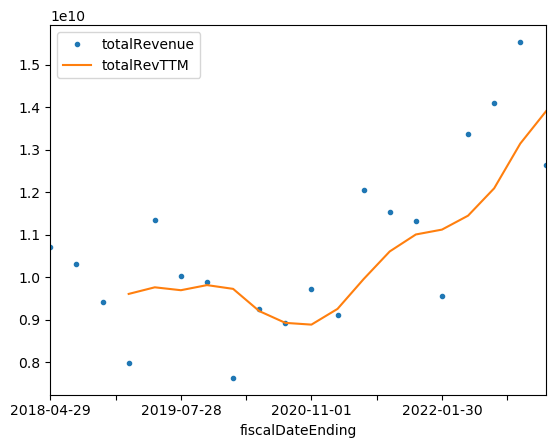

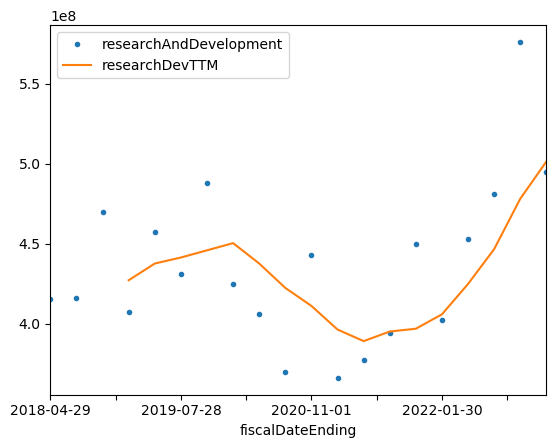

In [47]:
income_df.plot(y=[2,3],style=['.','-'])
income_df.plot(y=[8,9],style=['.','-'])

# From the top

In [23]:
import json
import datetime as dt
import pandas as pd

### CONSTANTS
edgar_dt_fmt = '%Y-%m-%d'
min_q_duration = dt.timedelta(days=80)
max_q_duration = dt.timedelta(days=100)
edgar_datetime_format = '%Y-%m-%d'

### FUNCTION DEFINITION

# Add leading zeros to ensure CIKs are 10-digits
def pad_ciks(ciks):
    for index, cik in enumerate(ciks):
        ciks[index] = cik.zfill(10)

# Build pandas dataframe with EDGAR data        
def build_company_df(cik):
    data_keys = ['accn','start','end','duration']
    edgar_data_keys = ['Revenues', \
                'NetIncomeLoss', \
                'CostOfGoodsAndServicesSold', \
                'SellingGeneralAndAdministrativeExpense']
    column_names = data_keys + edgar_data_keys
    
    data_dir = './data/companyfacts'
    
    edgar_dict = json.load(open( \
                 data_dir + '/CIK' + cik + '.json'))

    company_df = pd.DataFrame(columns=column_names)
    
    for key in edgar_data_keys:
        # Loop control variables 
        current_start = dt.datetime.min
        current_end = dt.datetime.min
        current_val = 0
        
        col_df = pd.DataFrame(columns=[key])
    
        print(key)
        for entry in edgar_dict['facts']['us-gaap'][key]['units']['USD']:

             if entry['fp'] in {'Q1','Q2','Q3','Q4','FY'}:
                duration = dt.datetime.strptime(entry['end'],edgar_datetime_format) - dt.datetime.strptime(entry['start'],edgar_datetime_format)
        
                # Only take this entry if is a quarterly entry
                if max_q_duration > duration > min_q_duration:
                    print(entry)
            
#             #Build data and append to df
#             col_df.append(pd.DataFrame(columns=key),index='')
            
#         print(col_df)
            
            
    

# TODO - download all company facts, extract to /data folder
# https://www.sec.gov/Archives/edgar/daily-index/xbrl/companyfacts.zip

# TODO - convert list of tickers to list of CIK

company_tickers = ['PTON','NFLX','KO','TM',\
                   'IRBT','ISRG','DE','UPH',\
                  'GRMN','TXT']
company_ciks = ['1639825','1065280','21344','1094517',\
               '1159167','1035267','315189','1770141',\
               '1121788','217346']

pad_ciks(company_ciks)

build_company_df(company_ciks[9])


Revenues
{'start': '2009-01-04', 'end': '2009-04-04', 'val': 2526000000, 'accn': '0000217346-10-000048', 'fy': 2010, 'fp': 'Q1', 'form': '10-Q', 'filed': '2010-04-30', 'frame': 'CY2009Q1'}
{'start': '2010-01-03', 'end': '2010-04-03', 'val': 2210000000, 'accn': '0000217346-10-000048', 'fy': 2010, 'fp': 'Q1', 'form': '10-Q', 'filed': '2010-04-30'}
{'start': '2010-01-03', 'end': '2010-04-03', 'val': 2210000000, 'accn': '0000217346-11-000048', 'fy': 2011, 'fp': 'Q1', 'form': '10-Q', 'filed': '2011-04-28', 'frame': 'CY2010Q1'}
{'start': '2010-01-04', 'end': '2010-04-03', 'val': 2210000000, 'accn': '0001193125-12-074981', 'fy': 2011, 'fp': 'FY', 'form': '10-K', 'filed': '2012-02-23'}
{'start': '2010-04-04', 'end': '2010-07-03', 'val': 2709000000, 'accn': '0000950123-11-070043', 'fy': 2011, 'fp': 'Q2', 'form': '10-Q', 'filed': '2011-07-29'}
{'start': '2010-04-04', 'end': '2010-07-03', 'val': 2709000000, 'accn': '0001193125-12-074981', 'fy': 2011, 'fp': 'FY', 'form': '10-K', 'filed': '2012-02-

In [43]:
# TODO - company life cycle
# Watch videos - Get list of keys to write to dataframe from companies
# create empty dataframe with keys
# populate dataframe
# graph
# write to spreadsheet


import datetime
import pandas as pd


# Constants
edgar_datetime_format = '%Y-%m-%d'

min_q_duration = datetime.timedelta(days=80)
max_q_duration = datetime.timedelta(days=100)


## Initialize variables

# Loop control variables 
current_start = datetime.datetime.min
current_end = datetime.datetime.min
current_val = 0

# Company variables
company_df = pd.DataFrame()


print(edgar_dict.keys())
print(edgar_dict['cik'])
print(edgar_dict['entityName'])

for entry in edgar_dict['facts']['us-gaap']['Revenues']['units']['USD']:
    print(entry['fp'])
    if entry['fp'] in {'Q1','Q2','Q3','Q4','FY'}:
        duration = datetime.datetime.strptime(entry['end'],edgar_datetime_format) - datetime.datetime.strptime(entry['start'],edgar_datetime_format)
        
        # Only take this entry if is a quarterly entry
        if max_q_duration > duration > min_q_duration:
            
            
            # Check if it's a repeat, throw error if mismatch
            if (datetime.datetime.strptime(entry['start'],edgar_datetime_format)==current_start \
                and datetime.datetime.strptime(entry['end'],edgar_datetime_format)==current_end) \
                and current_val!=entry['val']:
                print("TODO throw error")
            
            # Check if it's the next entry
            if datetime.datetime.strptime(entry['start'],edgar_datetime_format) > current_end:
                
                # Do stuff
                print(entry['fp'])
                print(entry['start'])
                print(entry['end'])
                print(entry['val'])
                
                # Advance the timeframe
                current_start = datetime.datetime.strptime(entry['start'],edgar_datetime_format)
                current_end = datetime.datetime.strptime(entry['end'],edgar_datetime_format)
                current_val = entry['val']
                
                

dict_keys(['cik', 'entityName', 'facts'])
1467373
Accenture plc
FY
Q1
Q1
2008-09-01
2008-11-30
6470608000
FY
Q2
Q2
Q2
2008-12-01
2009-02-28
5657563000
FY
Q3
Q3
Q3
2009-03-01
2009-05-31
5537348000
FY
FY
FY
FY
FY
2009-06-01
2009-08-31
5505449000
Q1
Q1
2009-09-01
2009-11-30
5747687000
FY
Q1
FY
Q2
Q2
Q2
Q2
2009-12-01
2010-02-28
5537823000
FY
Q2
FY
Q3
Q3
Q3
Q3
2010-03-01
2010-05-31
5975495000
FY
Q3
FY
FY
FY
FY
FY
FY
2010-06-01
2010-08-31
5833073000
FY
Q1
Q1
2010-09-01
2010-11-30
6478193000
FY
Q1
FY
Q2
Q2
Q2
Q2
2010-12-01
2011-02-28
6496293000
FY
Q2
FY
Q3
Q3
Q3
Q3
2011-03-01
2011-05-31
7204355000
FY
Q3
FY
FY
FY
FY
FY
FY
2011-06-01
2011-08-31
7174073000
FY
Q1
Q1
2011-09-01
2011-11-30
7589108000
FY
Q1
FY
FY
FY
2011-12-01
2012-02-28
7259828000
Q2
Q2
Q2
Q2
FY
Q3
Q3
Q3
Q3
2012-03-01
2012-05-31
7640790000
FY
Q3
FY
FY
FY
FY
FY
FY
2012-06-01
2012-08-31
7288259000
FY
Q1
Q1
2012-09-01
2012-11-30
7668036000
FY
Q1
FY
Q2
Q2
Q2
Q2
2012-12-01
2013-02-28
7493320000
FY
Q2
FY
Q3
Q3
Q3
Q3
2013-03-01
2013-05-31

# EDGAR API testing

In [50]:
# print(edgar_dict.keys()) # ['cik', 'entityName', 'facts']
print(edgar_dict['cik'])
print(edgar_dict['entityName'])
print(edgar_dict['facts'].keys())
print(edgar_dict['facts']['dei'].keys())
print(edgar_dict['facts']['invest'].keys())
#for key in edgar_dict['facts']['us-gaap'].keys(): print(key)





for entry in edgar_dict['facts']['us-gaap']['Revenues']['units']['USD']:
    if entry['form']=="10-Q": print(str(entry['end'] )+ ": " + str(entry['val']))


dict_keys(['cik', 'entityName', 'facts'])
1467373
Accenture plc
dict_keys(['dei', 'invest', 'us-gaap'])
dict_keys(['EntityCommonStockSharesOutstanding', 'EntityPublicFloat'])
dict_keys(['DerivativeNotionalAmount'])
AccountsPayableCurrent
AccountsReceivableNetCurrent
AccruedIncomeTaxesCurrent
AccruedIncomeTaxesNoncurrent
AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment
AccumulatedOtherComprehensiveIncomeLossAvailableForSaleSecuritiesAdjustmentNetOfTax
AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax
AccumulatedOtherComprehensiveIncomeLossDefinedBenefitPensionAndOtherPostretirementPlansNetOfTax
AccumulatedOtherComprehensiveIncomeLossForeignCurrencyTranslationAdjustmentNetOfTax
AccumulatedOtherComprehensiveIncomeLossNetOfTax
AdditionalPaidInCapital
AdjustmentsNoncashItemsToReconcileNetIncomeLossToCashProvidedByUsedInOperatingActivitiesOther
AdjustmentsToAdditionalPaidInCapitalSharebasedCompensationRequisiteServic

# Company life cycle notes

## From income statement:
- revenue
- earnings / net income
- Foreign exchange gain/loss
- Equity holdings gain/loss


## Example young company: Peloton (PTON)
- Revenue: doubles year/year
- Gross profits: Also doubles yr/yr
- pre-tax profit negative (pre-tax loss)
- COGS/SG&A high

## Example young growth: Netflix (NFLX)
- Revenue grows more slowly
- Positive net income (bottom line)

## Mature company: Coca-Cola (KO)
- Revenues flat
- SG&A expenses comparable to COGS

## Aging company: Toyota (TM)
- Revenues slightly declining

## Commodity

## Financial

## Pharmaceutical

# Damodaran valuation functions

In [ ]:
"""
TODO:

add EQUITY CLASS and member variables
    - add business mix/industry mix
    - debt_eq_ratio (fixed costs / total costs)
    - tax_rate as member variables of equity class

add INDUSTRY class and member variables
    - get beta for industries
    
    get equity risk premium
    
    compute cf_rate tuple from cf, year, terminal value 

    compute discount rate
    - cost of capital (firm valuation)
    
    estimate current earnings/cash flows to asset
    - CF to equity
    - CF to firm
    
    estimate future earnings and cash flows
    - estimate an expected growth rate in earnings
    
    estimate when it will reach "stable growth"
    
    estimate risk, cash flow at stability
    
    choose right DCF model, and value the asset

"""

# Country information

In [36]:
import yahooquery
# TODO - pull information from
# https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html

#add COUNTRY class and member variables
#    - currency
#    - risk free rate
#    - tax rate

class Country:
    name = "United States"
    adjusted_default_spread = 0.
    equity_risk_premium = .0594
    country_risk_premium = 0.
    tax_rate = .25
    moodys_rating = "Aaa"
    risk_free_rate = yahooquery.Ticker('^TNX').get_modules('price')['^TNX']['regularMarketPreviousClose']
        

usa = Country()
print(usa.equity_risk_premium)
print(usa.risk_free_rate)

0.0594
3.4299998


## Computing a bottom-up-beta (slides 72-75)

In [1]:
"""
inputs
    business_mix: n-dimensional list of tuples (weight_i, beta_i). Weights are normalized to 1.
    debt_eq_ratio: percentage of debt/equity in the range [0,1]
    tax_rate: tax rate in the range [0,1]
    
output
    beta_levered = levered beta for the equity
    
reference
    Aswath Damodaran powerpoint packet, slides 72-75
"""
def bottom_up_beta(business_mix, debt_eq_ratio, tax_rate):
    cum_sum = 0 # initialize cumulative sum of business mix
    beta_unlevered = 0 # initialize unlevered beta
    
    # Compute cumulative sum of business weights
    for index, business_compo, in enumerate(business_mix): # add each business weight
        cum_sum += business_compo[0]
    
    for index, business_compo, in enumerate(business_mix): # add each business weight
        beta_unlevered += business_compo[1]*business_compo[0]/cum_sum
    
    return beta_unlevered*(1+(1-tax_rate)*debt_eq_ratio)
    

In [5]:
# SAP test case
sap_mix = [(17.23,1.30),(4.40,1.05)]

sap_bub = bottom_up_beta(sap_mix,0.,0.)
print(sap_bub)

# SAP test case
embraer_mix = [(1,.95)]
embraer_debt_eq = .1895
embraer_tax_rate = .34

embraer_bub = bottom_up_beta(embraer_mix,embraer_debt_eq,embraer_tax_rate)
print(embraer_bub)

1.24914470642626
1.0688165


## DCF valuation (slides 3-4)

In [6]:
"""
Compute intrinsic value using discounted cash flow (DCF) valuation

inputs
    cf_rate: n-dimensional list of tuples, where n is the lifespan of the valuation,
             and the tuple contains (cf_t, r_t), where cf_t is the expected/certain 
             cash flows during the period, and r_t is the risk-adjusted or risk-free
             rate.
    
outputs
    value: Floating point value of the asset
    
reference
    Aswath Damodaran powerpoint packet, slides 3-4
    
"""
def dcf_intrinsic_value(cf_rate):
    dcf_value = 0 # initialize
    
    for index, cf_r, in enumerate(cf_rate): # add each value component
        dcf_value += cf_r[0]/(1 + cf_r[1])**(index +1)
        
    return dcf_value

def cost_of_equity(riskfree_rate,beta,equity_risk_premium):
    return riskfree_rate + beta*(equity_risk_premium)
    

In [30]:
# Equity evaluation from slides 9-10
cost_of_equity = .13625
terminal_eq_value = 1603
cf_rate_eq_example = [(50, cost_of_equity), 
                      (60, cost_of_equity),
                      (68, cost_of_equity),
                      (76.2, cost_of_equity),
                      (83.49 + terminal_eq_value, cost_of_equity)]

equity_value = dcf_intrinsic_value(cf_rate_eq_example)

print(equity_value)

1073.0065063585455


In [35]:
# Firm evaluation from slides 9-10
debt_value = 800
pre_tax_rate = 0.1 # long-term rate
tax_rate = 0.5
cost_of_debt = pre_tax_rate*(1 - tax_rate)
interest_expense = 40
term_firm_value = 2363.008

firm_value = debt_value + equity_value
wacc = (cost_of_equity*equity_value + cost_of_debt*debt_value)/firm_value

cf_rate_firm_example = [(50 + interest_expense, wacc), 
                      (60 + interest_expense, wacc),
                      (68 + interest_expense, wacc),
                      (76.2 + interest_expense, wacc),
                      (83.49 + interest_expense + term_firm_value, wacc)]

firm_dcf_value = dcf_intrinsic_value(cf_rate_firm_example)
print(firm_value)
print(firm_dcf_value)

1873.0065063585455
1873.4651511854781


# Test data downloading with yahooquery

In [1]:
import yahooquery
import requests
import urllib3

print('yahooquery version: ', yahooquery.__version__)
print('requests version: ', requests.__version__)
print('urllib3 version: ', urllib3.__version__)

yahooquery version:  2.3.0
requests version:  2.28.2
urllib3 version:  1.26.14


In [16]:
aapl = yahooquery.Ticker('aapl')

fin_data = aapl.all_financial_data()
modules = 'summaryDetail price defaultKeyStatistics'
company_info = aapl.get_modules(modules)

In [17]:
company_info

{'aapl': {'summaryDetail': {'maxAge': 1,
   'priceHint': 2,
   'previousClose': 153.71,
   'open': 152.35,
   'dayLow': 150.85,
   'dayHigh': 153.0,
   'regularMarketPreviousClose': 153.71,
   'regularMarketOpen': 152.35,
   'regularMarketDayLow': 150.85,
   'regularMarketDayHigh': 153.0,
   'dividendRate': 0.92,
   'dividendYield': 0.006,
   'exDividendDate': '2023-02-09 18:00:00',
   'payoutRatio': 0.1545,
   'fiveYearAvgDividendYield': 0.96,
   'beta': 1.277894,
   'trailingPE': 25.899832,
   'forwardPE': 23.183891,
   'volume': 59144118,
   'regularMarketVolume': 59144118,
   'averageVolume': 75166090,
   'averageVolume10days': 64755690,
   'averageDailyVolume10Day': 64755690,
   'bid': 152.56,
   'ask': 152.64,
   'bidSize': 1000,
   'askSize': 2200,
   'marketCap': 2413630849024,
   'fiftyTwoWeekLow': 124.17,
   'fiftyTwoWeekHigh': 179.61,
   'priceToSalesTrailing12Months': 6.22813,
   'fiftyDayAverage': 140.098,
   'twoHundredDayAverage': 147.39375,
   'trailingAnnualDividendRat

In [11]:
symbols = ['SWBI','U','ZM','ITOS']

# for symbol in symbols:
# Output 
symbols = 'fb aapl amzn nflx goog'

tickers = Ticker(symbols)
current_time = datetime.now()

TypeError: __init__() got an unexpected keyword argument 'allowed_methods'

# Debugging specific yahooquery calls

In [5]:
from datetime import timedelta
from PyDeepValue import companyinfo, DeepValue

dv = DeepValue()

symbol = "GTXAP"

company_data_dir = "./data/company_info"

company_dict = companyinfo.getCompanyData(str(symbol),dv.company_data_dir,dv.ticker_blacklist_path)

universe_df.at[symbol,'description'] = company_dict[symbol]['quoteType']['longName']
universe_df.at[symbol,'sector'] = company_dict[symbol]['assetProfile']['sector']
universe_df.at[symbol,'industry'] = company_dict[symbol]['assetProfile']['industry']
universe_df.at[symbol,'marketCap'] = company_dict[symbol]['summaryDetail']['marketCap']
universe_df.at[symbol,'enterpriseValue'] = company_dict[symbol]['defaultKeyStatistics']['enterpriseValue']

ModuleNotFoundError: No module named 'tickers'

# Test the spreadsheet generation and evaluation func

In [4]:
from PyDeepValue import DeepValue


FileNotFoundError: [Errno 2] No such file or directory: '../data/key.json'

In [3]:
import json

progress = 11909

value_tickers_list = json.load(open('data/value_tickers.json'))
print(progress/(len(value_tickers_list)*7))

minutes_per_file = (1/7)

print(str((len(value_tickers_list)*7 - progress)/minutes_per_file) + ' minutes to go')

0.21750009131752931
299915.0 minutes to go


In [7]:
import yfinance as yf
from datetime import datetime

# Get all the data


value_tickers_list = ['A','B','C','D','E']

for symbol in value_tickers_list:
    print(symbol)
    ticker = yf.Ticker(symbol)
    company_data_filepath = 'data/company_data/' + str(ticker) + '.json'
    
    # Get current datetime
    current_time = datetime.now()
    
#     print(ticker.info)
    print(ticker.get_financials())


A
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
B
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
C
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
D
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
E
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
